In [79]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, scipy as sp, math
from scipy.optimize import curve_fit

In [80]:
plt.style.use(['science', 'nature'])

In [91]:
def viral_load(t, a, b, alpha, beta):
    return a*math.e**(-alpha*t) + b*math.e**(-beta*t)

In [82]:
df = pd.read_csv('HIVseries.csv')

In [83]:
x_exp, y_exp = np.array(df.x), np.array(df.y)

array([0.    , 0.0831, 0.1465, 0.2587, 0.4828, 0.7448, 0.9817, 1.2563,
       1.4926, 1.7299, 1.9915, 3.0011, 4.0109, 5.009 , 5.9943, 7.0028])

In [112]:
guess = np.array([100,100000,10,1])
params, covarience = curve_fit(viral_load, x_exp, y_exp, p0=guess, maxfev=5000)

C:\Users\gkerr\AppData\Local\Temp\ipykernel_17684\246761586.py:2: RuntimeWarning: overflow encountered in power
  return a*math.e**(-alpha*t) + b*math.e**(-beta*t)


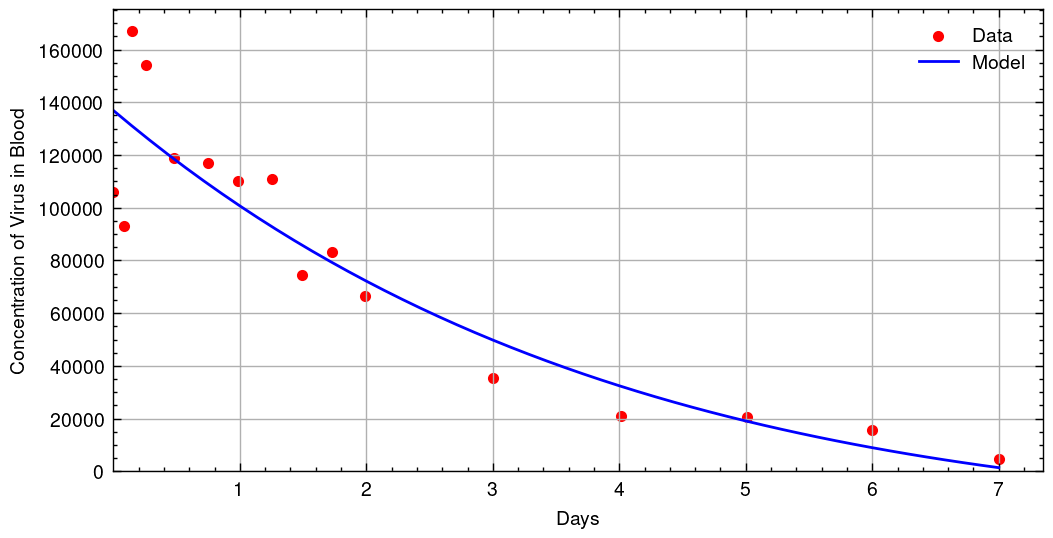

In [121]:
fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=200)
x_fit = np.linspace(0,7,50)
ax.scatter(x_exp, y_exp, color='red', label='Data')
ax.plot(x_fit, viral_load(x_fit,params[0],params[1],params[2],params[3]), color='blue', label="Model")
ax.set_xlabel("Days")
ax.set_ylabel("Concentration of Virus in Blood")
ax.set_xlim(0.00001)
ax.set_ylim(0)
plt.grid()
plt.legend()
_=plt.show()